In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_fum_salary_17-18')

In [3]:
tes.dtypes

NAME         object
FUM           int64
FUM_rank    float64
salary        int64
dtype: object

In [4]:
tes.head()

,NAME,FUM,FUM_rank,salary
0,Dion Sims,0,22.5,6000000
1,David Njoku,0,22.5,2381274
2,Trey Burton,0,22.5,2746000
3,Dwayne Allen,0,22.5,7350000
4,Demetrius Harris,0,22.5,2100000


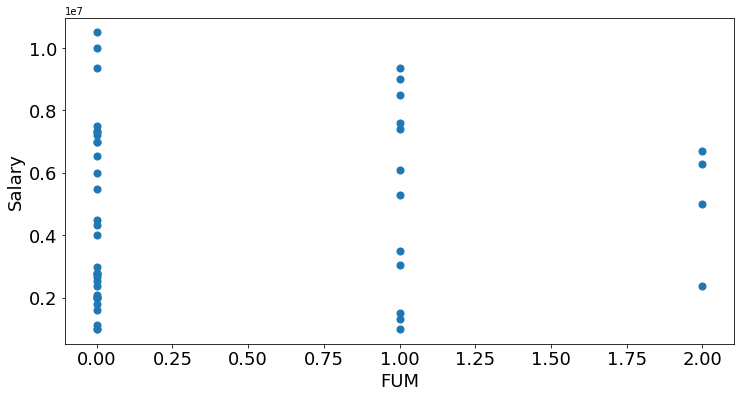

In [5]:
ax = tes.plot(kind="scatter", x = 'FUM',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUM', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['FUM', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 9.44870659e-17, -7.08652994e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.6608186 ,  1.03372163],
       [ 2.44502882,  0.13313334],
       [-0.6608186 , -0.81371905],
       [ 0.89210511,  1.03423785],
       [ 0.89210511, -0.9432392 ]])

In [11]:
km.predict(X)

array([0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 1,
       1, 1, 1], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,FUM,FUM_rank,salary,clusters
0,Dion Sims,0,22.5,6000000,0
1,David Njoku,0,22.5,2381274,2
2,Trey Burton,0,22.5,2746000,2
3,Dwayne Allen,0,22.5,7350000,0
4,Demetrius Harris,0,22.5,2100000,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[-5.55111512e-17,  7.60570000e+06],
       [ 2.00000000e+00,  5.08854175e+06],
       [ 1.11022302e-16,  2.44207463e+06],
       [ 1.00000000e+00,  7.60714286e+06],
       [ 1.00000000e+00,  2.08006380e+06]])

In [14]:
tes.groupby('clusters')[['FUM', 'salary']].mean()

,FUM,salary
clusters,,
0,0.0,7.605700e+06
1,2.0,5.088542e+06
2,0.0,2.442075e+06
3,1.0,7.607143e+06
4,1.0,2.080064e+06


In [15]:
centroids = tes.groupby('clusters')[['FUM', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

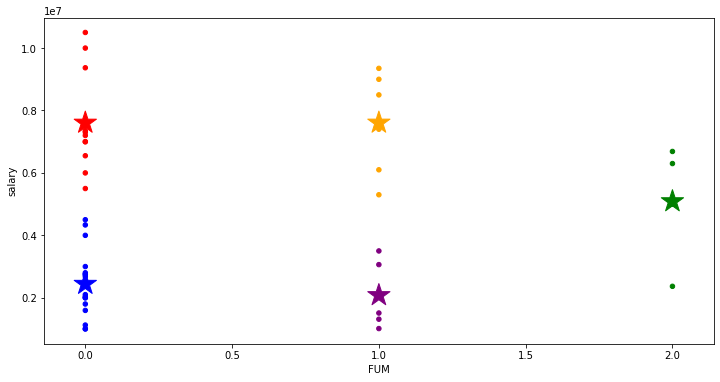

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'FUM', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUM', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

9.58946556915181

In [18]:
silhouette_score(X, km.labels_)

0.6449440829833885